# GitHub Stats for FLORIS
This notebook is used to connect to the GitHub stats database for the FLORIS repo to extract and visualize data



In [1]:
# add path above this notebook
import sys
sys.path.append("..") 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import dateutil

In [2]:
# import database
import database as dbc

In [3]:
# connect to the database

db = dbc.Database()

In [4]:
# retrieve data in the following range
# timestamps in format YYYY-MM-DD
from_date = '2018-01-01'
to_date = datetime.datetime.today().strftime('%Y-%m-%d') # set to today


In [5]:
print("FROM DATE: " + from_date)
print("TO DATE: " + to_date)

FROM DATE: 2018-01-01
TO DATE: 2024-04-04


In [6]:
results_wisdem = db.getResults(from_date, to_date, repo_code='wisdem_floris')
results_nrel_floris = db.getResults(from_date, to_date, repo_code='nrel_floris')
results_nrel_flasc = db.getResults(from_date, to_date, repo_code='nrel_flasc')
results_nrel_hercules = db.getResults(from_date, to_date, repo_code='nrel_hercules')
results_nrel_whoc = db.getResults(from_date, to_date, repo_code='nrel_whoc')
results_nrel_moa_python = db.getResults(from_date, to_date, repo_code='nrel_moa_python')

In [7]:
# Mix together
df_1 = pd.DataFrame(results_wisdem)
df_1['repo'] = 'floris_wisdem'
df_2 = pd.DataFrame(results_nrel_floris)
df_2['repo'] = 'floris_nrel'
df_3 = pd.DataFrame(results_nrel_flasc)
df_3['repo'] = 'flasc_nrel'
df_4 = pd.DataFrame(results_nrel_hercules)
df_4['repo'] = 'hercules_nrel'
df_5 = pd.DataFrame(results_nrel_whoc)
df_5['repo'] = 'whoc_nrel'
df_6 = pd.DataFrame(results_nrel_moa_python)
df_6['repo'] = 'moa_python_nrel'

df = df_1.append(df_2).append(df_3).append(df_4).append(df_5).append(df_6)
df['timestamp'] = pd.to_datetime(df.timestamp)

In [8]:
# Mix together with 1 week resampling
df_1 = pd.DataFrame(results_wisdem)
df_1['timestamp'] = pd.to_datetime(df_1.timestamp)
df_1 = df_1.resample('7D', on='timestamp').sum().reset_index()
df_1['repo'] = 'floris_wisdem'

df_2 = pd.DataFrame(results_nrel_floris)
df_2['timestamp'] = pd.to_datetime(df_2.timestamp)
df_2 = df_2.resample('7D', on='timestamp').sum().reset_index()
df_2['repo'] = 'floris_nrel'

df_3 = pd.DataFrame(results_nrel_flasc)
df_3['timestamp'] = pd.to_datetime(df_3.timestamp)
df_3 = df_3.resample('7D', on='timestamp').sum().reset_index()
df_3['repo'] = 'flasc_nrel'

df_4 = pd.DataFrame(results_nrel_hercules)
df_4['timestamp'] = pd.to_datetime(df_4.timestamp)
df_4 = df_4.resample('7D', on='timestamp').sum().reset_index()
df_4['repo'] = 'hercules_nrel'

df_5 = pd.DataFrame(results_nrel_whoc)
df_5['timestamp'] = pd.to_datetime(df_5.timestamp)
df_5 = df_5.resample('7D', on='timestamp').sum().reset_index()
df_5['repo'] = 'whoc_nrel'

df_6 = pd.DataFrame(results_nrel_moa_python)
df_6['timestamp'] = pd.to_datetime(df_6.timestamp)
df_6 = df_6.resample('7D', on='timestamp').sum().reset_index()
df_6['repo'] = 'moa_python_nrel'


df = df_1.append(df_2).append(df_3).append(df_4).append(df_5).append(df_6)
df['timestamp'] = pd.to_datetime(df.timestamp)

In [9]:
# Melt the data for dope plotting
df_melt = pd.melt(df,id_vars=['repo','timestamp'])
df_melt = df_melt.sort_values(['timestamp'])
df_melt.head()

,repo,timestamp,variable,value
0,floris_wisdem,2019-01-05,views_total,109.0
1094,floris_wisdem,2019-01-05,views_uniques,32.0
1641,floris_wisdem,2019-01-05,clones_uniques,8.0
547,floris_wisdem,2019-01-05,clones_total,9.0
548,floris_wisdem,2019-01-12,clones_total,26.0


/Users/pfleming/opt/anaconda3/envs/github_stats/lib/python3.6/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


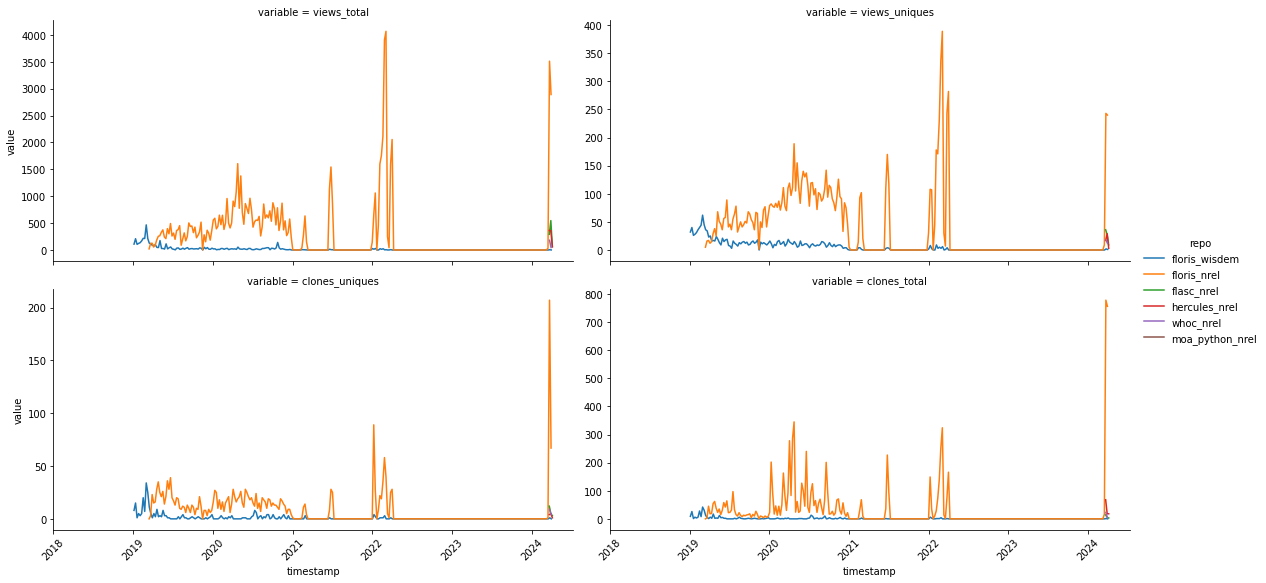

In [10]:
# Dope plots
g = sns.FacetGrid(df_melt,col='variable',col_wrap=2,hue='repo',size=4,sharey=False,aspect=2)
g.map(plt.plot,'timestamp','value')
g.add_legend()
g.set_xticklabels(rotation=45)

In [11]:
# Weekly resample
df_melt_2 = df_melt.set_index(['repo','variable'])
df_melt_2 = df_melt_2.resample('7D',on='timestamp').mean()


df_melt_2

,value
timestamp,
2019-01-05,39.500000
2019-01-12,72.750000
2019-01-19,33.250000
2019-01-26,40.500000
2019-02-02,43.250000
...,...
2024-03-02,0.000000
2024-03-09,7.500000
2024-03-16,288.750000


In [12]:
# Reformulate as rolling
# Mix together
df_1 = pd.DataFrame(results_wisdem).fillna(0).sort_values(['timestamp'])
df_1 = df_1.set_index('timestamp').cumsum().reset_index()
df_1['repo'] = 'floris_wisdem'
df_2 = pd.DataFrame(results_nrel_floris).fillna(0).sort_values(['timestamp'])
df_2 = df_2.set_index('timestamp').cumsum().reset_index()
df_2['repo'] = 'floris_nrel'
df_3 = pd.DataFrame(results_nrel_flasc).fillna(0).sort_values(['timestamp'])
df_3 = df_3.set_index('timestamp').cumsum().reset_index()
df_3['repo'] = 'flasc_nrel'

df = df_1.append(df_2).append(df_3)
df['timestamp'] = pd.to_datetime(df.timestamp)

In [13]:
# Melt the data for dope plotting
df_melt = pd.melt(df,id_vars=['repo','timestamp'])
df_melt = df_melt.sort_values(['timestamp'])

/Users/pfleming/opt/anaconda3/envs/github_stats/lib/python3.6/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


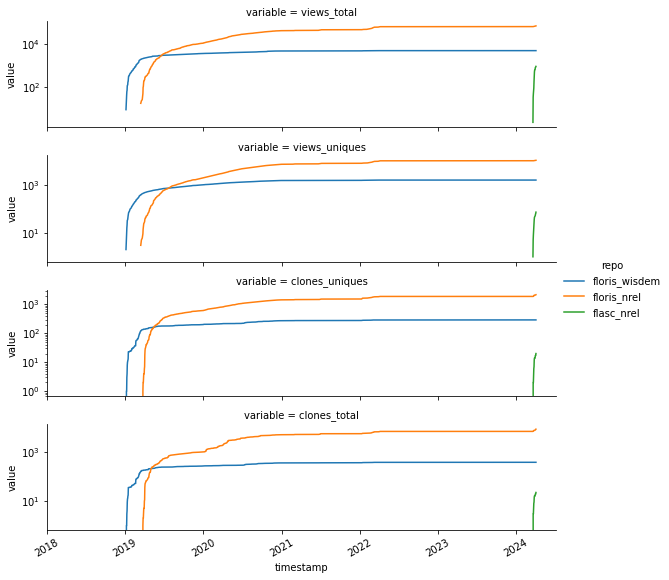

In [14]:
# Dope plots
df_melt['timestamp'] = pd.to_datetime(df_melt.timestamp)
g = sns.FacetGrid(df_melt,row='variable',hue='repo',size=2,sharey=False,aspect=4)
g.map(plt.semilogy,'timestamp','value')
g.add_legend()
g.set_xticklabels(rotation=30)

/Users/pfleming/opt/anaconda3/envs/github_stats/lib/python3.6/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


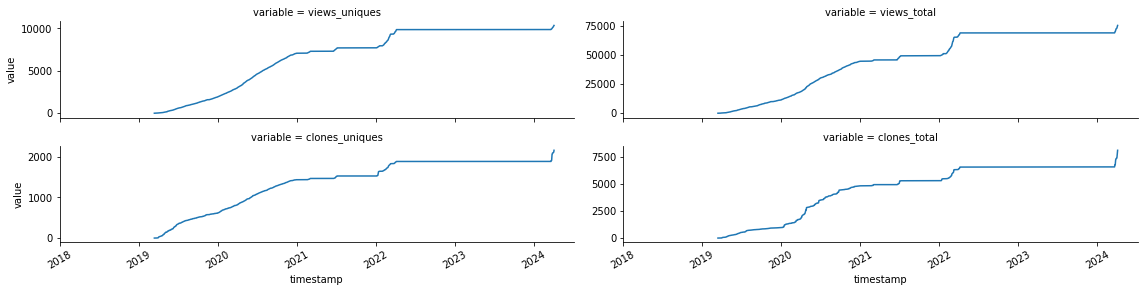

In [15]:
# Just FLORIS
# Dope plots
df_melt['timestamp'] = pd.to_datetime(df_melt.timestamp)
df_melt_sub = df_melt[df_melt.repo=='floris_nrel']
g = sns.FacetGrid(df_melt_sub,col='variable',size=2,sharey=False,aspect=4,col_wrap=2)
g.map(plt.plot,'timestamp','value')
# g.add_legend()
g.set_xticklabels(rotation=30)

In [16]:
df_sub = df_melt[df_melt.repo=='floris_nrel']
df_sub = df_sub[df_sub.variable.isin(['clones_total','clones_uniques'])]
df_sub

,repo,timestamp,variable,value
4800,floris_nrel,2019-03-15,clones_uniques,0.0
2020,floris_nrel,2019-03-15,clones_total,0.0
2021,floris_nrel,2019-03-18,clones_total,0.0
4801,floris_nrel,2019-03-18,clones_uniques,0.0
4802,floris_nrel,2019-03-22,clones_uniques,0.0
...,...,...,...,...
2763,floris_nrel,2024-04-02,clones_total,7667.0
2764,floris_nrel,2024-04-03,clones_total,7865.0
5544,floris_nrel,2024-04-03,clones_uniques,2124.0
2765,floris_nrel,2024-04-04,clones_total,8105.0


/Users/pfleming/opt/anaconda3/envs/github_stats/lib/python3.6/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


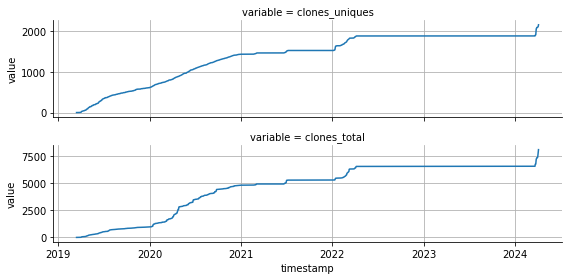

In [17]:
# Dope plots
df_melt['timestamp'] = pd.to_datetime(df_melt.timestamp)
df_sub = df_melt[df_melt.repo=='floris_nrel']
df_sub = df_sub[df_sub.variable.isin(['clones_total','clones_uniques'])]
g = sns.FacetGrid(df_sub,row='variable',hue='repo',size=2,sharey=False,aspect=4)
g.map(plt.plot,'timestamp','value')
for ax in g.axes.flatten():
    ax.grid(True)
# g.add_legend()
# g.set_xticklabels(rotation=30)

## TOTAL COUNTS

In [18]:
# Get total counts for all time recorded
totals = db.getTotals()
print(totals)

GETTING TOTAL UNIQUE VIEWS AND CLONES
(   total_unique_clones  total_unique_views  from_date    to_date
0                  291                1558 2019-01-05 2024-04-04,    total_unique_clones  total_unique_views  from_date    to_date
0                 2159               10350 2019-03-15 2024-04-04,    total_unique_clones  total_unique_views  from_date    to_date
0                   20                  72 2024-03-21 2024-04-04)


In [19]:
totals

(   total_unique_clones  total_unique_views  from_date    to_date
 0                  291                1558 2019-01-05 2024-04-04,
    total_unique_clones  total_unique_views  from_date    to_date
 0                 2159               10350 2019-03-15 2024-04-04,
    total_unique_clones  total_unique_views  from_date    to_date
 0                   20                  72 2024-03-21 2024-04-04)